In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [10]:
# Load dataset
data = pd.read_csv('creditcard.csv')

# Feature Engineering: Adding Transaction Amount Change
data['AmountChange'] = data['Amount'].pct_change().fillna(0)

In [11]:
# Separate features and target
X = data.drop('Class', axis=1)  # 'Class' is the target column
y = data['Class']


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Feature for Transaction Amount Change
data['AmountChange'] = data['Amount'].pct_change().fillna(0)

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace all inf and -inf values with NaN across all columns in both X_train and X_test
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaN values with 0 in both X_train and X_test
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Handling Class Imbalance: Combining Under-sampling and SMOTE
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_res, y_res)

# Feature Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Now X_test should be free of problematic values




Logistic Regression Confusion Matrix:
 [[83146  2161]
 [   10   126]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Logistic Regression ROC AUC Score: 0.9505692760886459


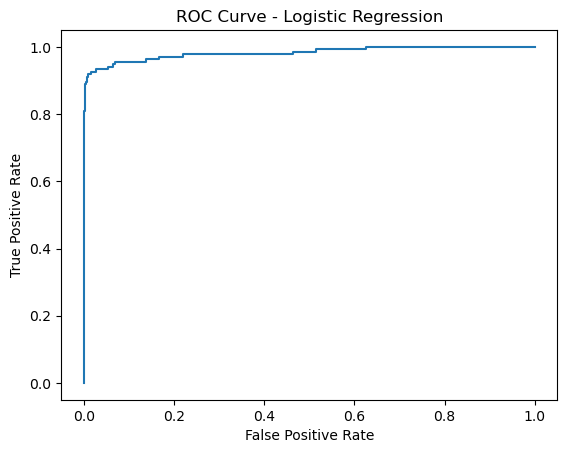

Logistic Regression Confusion Matrix (with adjusted threshold):
 [[83961  1346]
 [   10   126]]

Logistic Regression Classification Report (with adjusted threshold):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.09      0.93      0.16       136

    accuracy                           0.98     85443
   macro avg       0.54      0.96      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Random Forest Confusion Matrix:
 [[83152  2155]
 [   10   126]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Random Forest ROC AUC Score: 0.9506044431909939


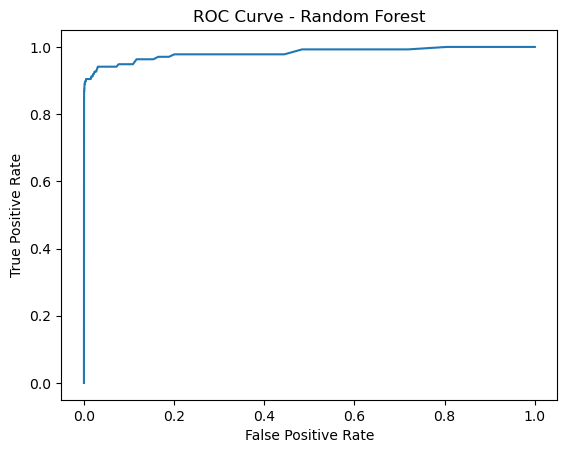

In [18]:
# Logistic Regression with Balanced Class Weight
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the Logistic Regression model
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Plotting ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()

# Adjust Classification Threshold to Improve Precision
threshold = 0.6  # Experiment with different values like 0.6, 0.7, etc.
y_pred_thresholded = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluate Logistic Regression with adjusted threshold
print("Logistic Regression Confusion Matrix (with adjusted threshold):\n", confusion_matrix(y_test, y_pred_thresholded))
print("\nLogistic Regression Classification Report (with adjusted threshold):\n", classification_report(y_test, y_pred_thresholded))

# Random Forest Classifier with Balanced Class Weight
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predicting on test data with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Plotting ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()
